Датасет: Airbnb Global Listings

Ссылка на датасет: https://www.kaggle.com/datasets/joebeachcapital/airbnb

Цели нашей работы:
* Разведочный анализ данных (EDA) для понимания структуры и распределений

* Статистический анализ ключевых признаков

* Построение и оценка моделей для прогнозирования цены



В данном проекте проводится исследование датасета Airbnb с целью выявления факторов, влияющих на успешность размещений. Под успешностью понимается популярность объекта — например, высокая частота бронирований, большое количество отзывов или высокий средний рейтинг. Задача заключается в том, чтобы определить, какие характеристики объявления — такие как цена, расположение, тип жилья, наличие удобств или политика отмены — способствуют его привлекательности для гостей.

Исследование начинается с разведочного анализа данных (EDA), включающего оценку структуры датасета, выявление пропусков и выбросов, а также изучение распределений признаков. Особое внимание уделяется целевой переменной, отражающей успешность объекта размещения — это может быть, например, число отзывов в месяц или общий рейтинг. Изучаются как числовые, так и категориальные признаки, проводится анализ взаимосвязей между переменными, формулируются гипотезы о влиянии различных факторов.

На следующем этапе строятся модели машинного обучения, способные прогнозировать успешность жилья. В рамках работы используются три алгоритма классификации: логистическая регрессия, метод k-ближайших соседей (kNN) и случайный лес. Модели обучаются на основе отобранных признаков, включающих цену, расположение, тип жилья, оценки гостей, набор удобств, а также параметры, связанные с хозяином.

Для оценки качества моделей применяются такие метрики, как точность, полнота, F1-мера и ROC-AUC. Это позволяет объективно сравнить эффективность различных алгоритмов и выбрать наилучший вариант.

Предварительные гипотезы исследования заключаются в том, что такие факторы, как разумная цена, положительные отзывы, удачное местоположение и широкий набор удобств, положительно влияют на популярность объявления. Также предполагается, что опыт и активность хоста, гибкие условия отмены и невысокие требования к минимальному сроку аренды могут способствовать увеличению спроса.

Ожидаемый результат работы — выделение наиболее значимых факторов, определяющих успешность размещения, а также построение моделей, способных предсказывать популярность объектов на платформе Airbnb. Выводы будут подтверждены наглядными визуализациями, иллюстрирующими ключевые зависимости и важность признаков.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('airbnb-listings.csv', sep=';')

df.head()

<ipython-input-3-5c98af442252>:1: DtypeWarning: Columns (0,2,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('airbnb-listings.csv', sep=';')


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,4008728,https://www.airbnb.com/rooms/4008728,20170402075052,2017-04-02,"Luxurious 3 bedroom, centrum, 180m2",‪This luxurious apartment is situated in the c...,In the heart of hip & lively Amsterdam Centrum...,‪This luxurious apartment is situated in the c...,none,There is a wide variety of cafes and restauran...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,1.52,"52.36523660409065, 4.878249575101092","Host Has Profile Pic,Host Identity Verified,Is..."
1,7778612,https://www.airbnb.com/rooms/7778612,20170402075052,2017-04-02,Luxury apartment in city centre,"Beautiful, large (105m2, 2 floors) and quiet a...",1 living room 1 dining room 2 bedrooms 1 bathr...,"Beautiful, large (105m2, 2 floors) and quiet a...",none,Within a few minutes walking you'll be in the ...,...,10.0,10.0,9.0,NaN,Amsterdam,strict,1.0,0.81,"52.367309030897516, 4.8738407410699915","Host Is Superhost,Host Has Profile Pic,Host Id..."
2,8264596,https://www.airbnb.com/rooms/8264596,20170402075052,2017-04-02,Cosy apartment across Vondelpark,This central located apartment will make you f...,NaN,This central located apartment will make you f...,none,NaN,...,10.0,10.0,10.0,NaN,Amsterdam,flexible,1.0,0.05,"52.361943953804776, 4.866686522141489","Host Has Profile Pic,Host Identity Verified,Is..."
3,2180729,https://www.airbnb.com/rooms/2180729,20170402075052,2017-04-02,Spacious City Apartment Oud-West,Living like an Amsterdam resident in this ligh...,There are 2 bedrooms each with a double bed. I...,Living like an Amsterdam resident in this ligh...,none,The 85 m2 apartment is located on a quiet stre...,...,9.0,9.0,9.0,NaN,Amsterdam,flexible,1.0,0.62,"52.37014616115532, 4.866281767968382","Host Has Profile Pic,Host Identity Verified,Is..."
4,14463171,https://www.airbnb.com/rooms/14463171,20170402075052,2017-04-02,Cosy Studio Apartment Center Amsterdam,Studio Apartment Centre Amsterdam Perfect stud...,NaN,Studio Apartment Centre Amsterdam Perfect stud...,none,NaN,...,8.0,9.0,9.0,NaN,Amsterdam,moderate,1.0,2.04,"52.368817829014425, 4.871249476925455",Host Has Profile Pic


<ipython-input-9-5a2caa3e0251>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette=colors)


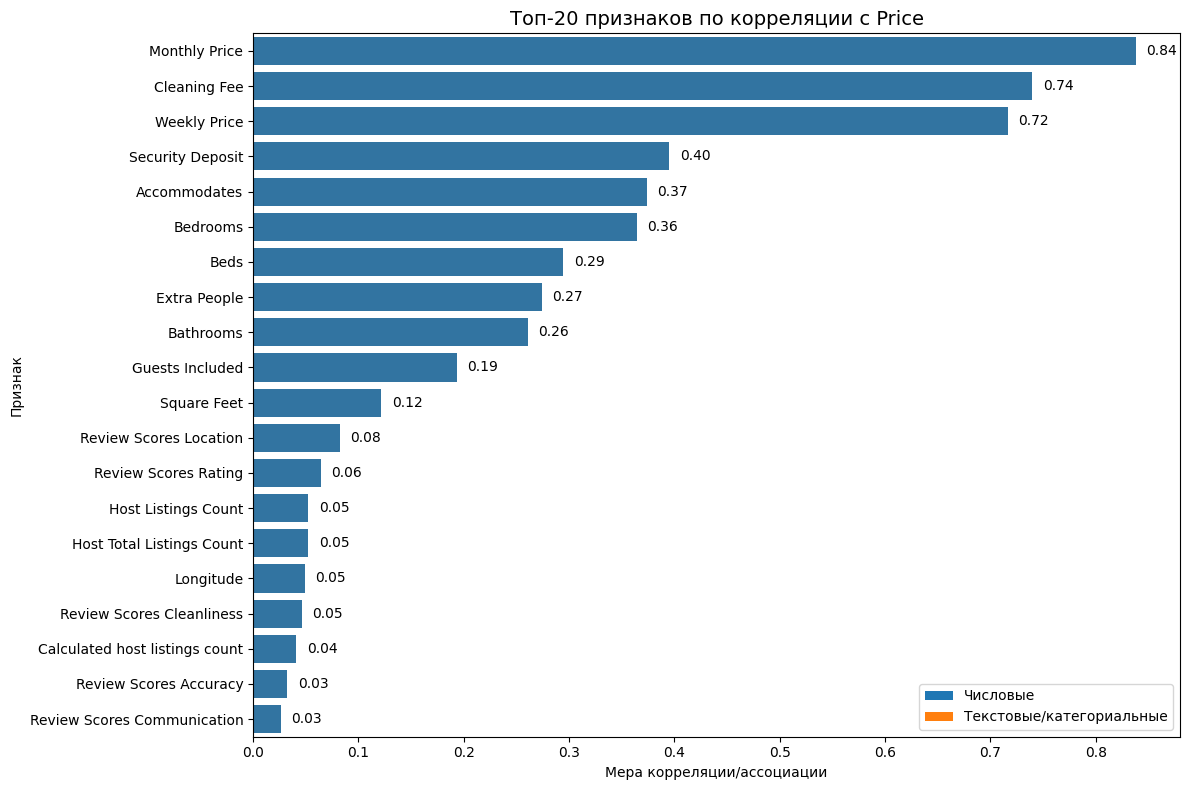


Все признаки с мерой корреляции:
                           Признак  Корреляция
0                    Monthly Price    0.838039
1                     Cleaning Fee    0.739720
2                     Weekly Price    0.716212
3                 Security Deposit    0.395048
4                     Accommodates    0.373973
5                         Bedrooms    0.364242
6                             Beds    0.294682
7                     Extra People    0.274276
8                        Bathrooms    0.260599
9                  Guests Included    0.193653
10                     Square Feet    0.121704
11          Review Scores Location    0.082470
12            Review Scores Rating    0.064306
13             Host Listings Count    0.052333
14       Host Total Listings Count    0.052333
15                       Longitude    0.049222
16       Review Scores Cleanliness    0.046022
17  Calculated host listings count    0.040973
18          Review Scores Accuracy    0.032642
19     Review Scores Commu

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, f_oneway

def analyze_all_correlations(df, target_col='Price', top_n=15):
    temp_df = df.copy()

    numeric_corrs = temp_df.select_dtypes(include=np.number).corr()[target_col].drop(target_col)

    text_corrs = {}
    text_cols = temp_df.select_dtypes(include=['object', 'category']).columns

    for col in text_cols:
        if temp_df[col].nunique() == 2:
            corr, _ = pointbiserialr(temp_df[col].factorize()[0], temp_df[target_col])
            text_corrs[col] = corr
        elif temp_df[col].nunique() < 20: 
            groups = temp_df.groupby(col)[target_col].apply(list)
            f_val, _ = f_oneway(*groups)
            text_corrs[col] = np.sqrt(f_val / (f_val + len(temp_df) - len(groups))) 

    all_corrs = pd.concat([
        numeric_corrs,
        pd.Series(text_corrs)
    ]).sort_values(ascending=False)

    plt.figure(figsize=(12, 8))
    top_features = all_corrs.head(top_n)

    colors = ['#1f77b4' if feat in numeric_corrs.index else '#ff7f0e' for feat in top_features.index]

    sns.barplot(x=top_features.values, y=top_features.index, palette=colors)
    plt.title(f'Топ-{top_n} признаков по корреляции с {target_col}', fontsize=14)
    plt.xlabel('Мера корреляции/ассоциации')
    plt.ylabel('Признак')

    plt.legend(handles=[
        plt.Rectangle((0,0),1,1,fc='#1f77b4'),
        plt.Rectangle((0,0),1,1,fc='#ff7f0e')
    ], labels=['Числовые', 'Текстовые/категориальные'])

    for i, v in enumerate(top_features.values):
        plt.text(v + 0.01, i, f"{v:.2f}", color='black', va='center')

    plt.tight_layout()
    plt.show()

    return pd.DataFrame({'Признак': all_corrs.index,
                        'Корреляция': all_corrs.values})
correlations = analyze_all_correlations(df, 'Price', 20)
print("\nВсе признаки с мерой корреляции:")
print(correlations)

Мы будем пользоваться следующими признаками:

In [10]:
item0 = df.shape[0]  
df = df.drop_duplicates()  
item1 = df.shape[0] 
print(f"There are {item0-item1} duplicates found in the dataset") 

df = df[df['Price']>0]

replacement_dict = {'Αθήνα, Greece': 'Athens, Greece',
                    'Athina, Greece': 'Athens, Greece',
                    'Roma, Italy': 'Rome, Italy',
                    'Venezia, Italy': 'Venice, Italy',
                    'København, Denmark': 'Copenhagen, Denmark',
                    'Montréal, Canada': 'Montreal, Canada',
                    'Ville de Québec, Canada': 'Québec, Canada',
                    'Genève, Switzerland': 'Geneva, Switzerland',
                    'Palma, Spain': 'Palma de Mallorca, Spain',
                    'Wien, Austria': 'Vienna, Austria',
                    'Greater London, United Kingdom': 'London, United Kingdom'
                   }
df['Smart Location'] = df['Smart Location'].replace(replacement_dict).fillna('None').astype(str)

selected_cols = ['Price', 'Smart Location', 'Room Type', 'Property Type', 'Bed Type', 'Availability 365', 'Minimum Nights',
                 'Number of Reviews', 'Review Scores Rating', 'Cancellation Policy']
df = df[selected_cols]
print(df.shape) 
df.sample(5).T  

There are 0 duplicates found in the dataset
(486974, 10)


,44849,289062,282098,372183,107223
Price,45.0,60.0,60.0,44.0,33.0
Smart Location,"London, United Kingdom","Vienna, Austria","Paris, France","Madrid, Spain","London, United Kingdom"
Room Type,Private room,Entire home/apt,Entire home/apt,Entire home/apt,Private room
Property Type,Apartment,Apartment,Apartment,Apartment,House
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Availability 365,0.0,0.0,287.0,309.0,0.0
Minimum Nights,1.0,2.0,1.0,2.0,3.0
Number of Reviews,0.0,2.0,42.0,105.0,0.0
Review Scores Rating,NaN,100.0,87.0,86.0,NaN
Cancellation Policy,flexible,moderate,moderate,strict,flexible


In [ ]:
text_cols = ['Room Type', 'Property Type', 'Bed Type', 'Cancellation Policy']
for col in text_cols:
    df[col] = df[col].fillna('Unknown').str.strip().str.title()

num_cols = ['Availability 365', 'Minimum Nights', 'Number of Reviews', 'Review Scores Rating']
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

price_threshold = df['Price'].quantile(0.99)
df = df[df['Price'] <= price_threshold]

df = df[
    (df['Availability 365'] >= 0) &
    (df['Availability 365'] <= 365) &
    (df['Minimum Nights'] > 0) &
    (df['Review Scores Rating'] >= 0) &
    (df['Review Scores Rating'] <= 100)
].reset_index(drop=True)

print("\nСтатистика после очистки:")
print(f"Осталось записей: {df.shape[0]}")
print(f"Пропущенных значений:\n{df.isna().sum()}")

print("\nПроверка выбросов:")
print(df[['Price', 'Availability 365', 'Minimum Nights']].describe())

display(df.sample(5).T)


Статистика после очистки:
Осталось записей: 482322
Пропущенных значений:
Price                   0
Smart Location          0
Room Type               0
Property Type           0
Bed Type                0
Availability 365        0
Minimum Nights          0
Number of Reviews       0
Review Scores Rating    0
Cancellation Policy     0
dtype: int64

Проверка выбросов:
               Price  Availability 365  Minimum Nights
count  482322.000000     482322.000000   482322.000000
mean      130.720036        166.386093        3.469717
std       130.074250        140.351437       90.531430
min         1.000000          0.000000        1.000000
25%        55.000000         15.000000        1.000000
50%        90.000000        149.000000        2.000000
75%       150.000000        313.000000        3.000000
max       801.000000        365.000000    60000.000000


,240337,187522,203639,12749,337946
Price,175.0,75.0,103.0,65.0,60.0
Smart Location,"Venice, CA","Dorval, Canada","Barcelona, Spain","Los Angeles, CA","Palmanova, Spain"
Room Type,Private Room,Private Room,Entire Home/Apt,Shared Room,Entire Home/Apt
Property Type,Apartment,House,Apartment,Apartment,Apartment
Bed Type,Real Bed,Real Bed,Real Bed,Real Bed,Real Bed
Availability 365,0.0,236.0,197.0,360.0,365.0
Minimum Nights,1.0,1.0,2.0,1.0,1.0
Number of Reviews,2.0,13.0,37.0,0.0,1.0
Review Scores Rating,100.0,100.0,89.0,95.0,80.0
Cancellation Policy,Flexible,Flexible,Moderate,Flexible,Flexible


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 486974 entries, 0 to 494953
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Price                 486974 non-null  float64
 1   Smart Location        486974 non-null  object 
 2   Room Type             486974 non-null  object 
 3   Property Type         486964 non-null  object 
 4   Bed Type              486974 non-null  object 
 5   Availability 365      486973 non-null  float64
 6   Minimum Nights        486973 non-null  float64
 7   Number of Reviews     486973 non-null  float64
 8   Review Scores Rating  362421 non-null  float64
 9   Cancellation Policy   486973 non-null  object 
dtypes: float64(5), object(5)
memory usage: 40.9+ MB


In [23]:
cols_to_clean = ['Room Type', 'Property Type', 'Bed Type', 'Cancellation Policy', 'Smart Location']

for col in cols_to_clean:
    if col in df.columns:
        df.drop(df[(df[col] == 'Unknown') | (df[col] == '9')].index, inplace=True)
        df.reset_index(drop=True, inplace=True)

In [24]:
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (12, 6)

def interactive_plot_only(df, target_col='Price'):
    x_dropdown = widgets.Dropdown(
        options=df.columns,
        description='Ось X:',
        value=df.columns[0]
    )

    y_dropdown = widgets.Dropdown(
        options=df.columns,
        description='Ось Y:',
        value=target_col
    )

    graph_type = widgets.Dropdown(
        options=['scatter', 'bar'],
        description='Тип графика:',
        value='scatter'
    )
    def update_plot(x_col, y_col, plot_type):
        plt.figure(figsize=(12, 6))

        if plot_type == 'bar' or (df[x_col].dtype == 'object' or df[x_col].nunique() < 10):
            df.groupby(x_col)[y_col].mean().plot(kind='bar')
            plt.xticks(rotation=45)
        else:
            plt.scatter(df[x_col], df[y_col], alpha=0.5)

        plt.title(f'{y_col} vs {x_col}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.grid(True)
        plt.show()
    interactive_plot = widgets.interactive(
        update_plot,
        x_col=x_dropdown,
        y_col=y_dropdown,
        plot_type=graph_type
    )

    display(interactive_plot)
interactive_plot_only(df, target_col='Price')

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

interactive(children=(Dropdown(description='Ось X:', options=('Price', 'Smart Location', 'Room Type', 'Propert…

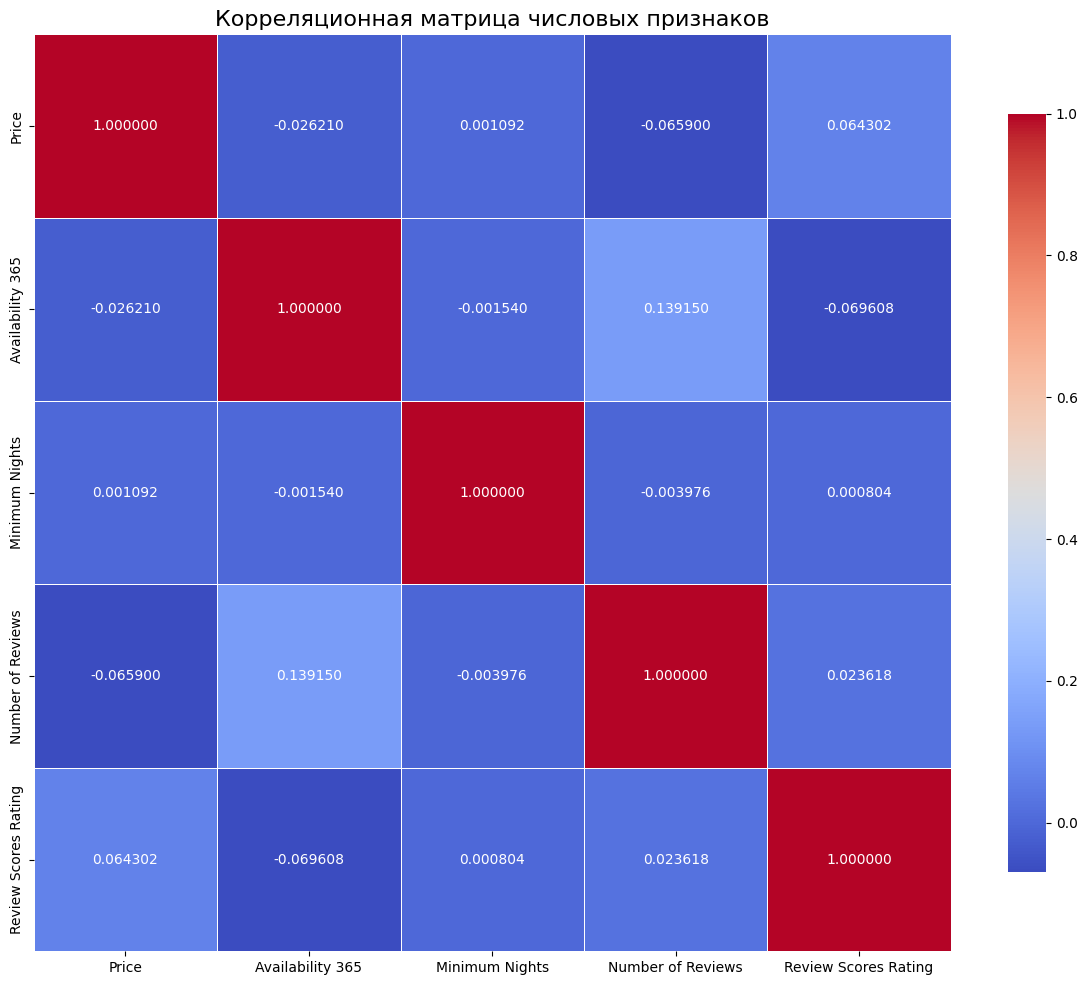

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include='number')
plt.figure(figsize=(12, 10))
corr = numeric_cols.corr()

sns.heatmap(
    corr,
    annot=True,         
    fmt=".6f",          
    cmap='coolwarm',    
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": .8}
)

plt.title('Корреляционная матрица числовых признаков', fontsize=16)
plt.tight_layout()
plt.show()